**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: ERICK ALAN CUELLAR QUINTANILLA
*   MATRÍCULA: A01383577


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
import pandas as pd
air_df = pd.read_csv('C:\Coding\Masters\DataScience\Actividad2\LaqnData.csv')

print('-'*10, 'SHAPE','-'*10)
print(air_df.shape)

print('-'*10, 'COLUMNS','-'*10)
print(air_df.columns)

print('-'*10, 'HEAD','-'*10)
print(air_df.head())

print('-'*10, 'TAIL','-'*10)
print(air_df.tail())

print('-'*10, 'DTYPES','-'*10)
print(air_df.dtypes)


---------- SHAPE ----------
(43800, 6)
---------- COLUMNS ----------
Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
---------- HEAD ----------
  Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1  CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2  CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3  CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4  CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R
---------- TAIL ----------
      Site Species   ReadingDateTime  Value   Units Provisional or Ratified
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3   PM2.5  31/12/2017 20:00    6.0  ug m-3                       R
43797  CT3   PM2.5  31/12/2017 21:00    5.0  ug m-3                       R
43798  CT3   PM2.5  3

In [2]:

print('-'*10, '% DE VALORES FALTANTES','-'*10)
print(air_df.isna().sum() * 100 / len(air_df))

---------- % DE VALORES FALTANTES ----------
Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [3]:
print('-'*10, 'CANTIDAD DE VALORES ÚNICOS POR COLUMNA', '-'*10)
print(air_df.nunique())

---------- CANTIDAD DE VALORES ÚNICOS POR COLUMNA ----------
Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64


In [4]:
print('-'*10, '¿CUANTAS MEDICIONES SE HICIERON?', '-'*10)
mediciones = air_df['ReadingDateTime'].unique()
print(f'Se hicieron {len(mediciones)} mediciones.')



---------- ¿CUANTAS MEDICIONES SE HICIERON? ----------
Se hicieron 8760 mediciones.


In [5]:
print('-'*10, 'NUMERO DE VALORES UNICOS EN LA COLUMNA SPECIES (CONTAMINANTES DEL AIRE)', '-'*10)
contaminantes = air_df['Species'].unique()
print(f'Se analizaron {len(contaminantes)} contaminantes: {contaminantes}.')



---------- NUMERO DE VALORES UNICOS EN LA COLUMNA SPECIES (CONTAMINANTES DEL AIRE) ----------
Se analizaron 5 contaminantes: ['NO' 'NO2' 'NOX' 'PM10' 'PM2.5'].


In [6]:
print('-'*10, 'COLUMNAS QUE NO AGREGARON VALOR INFORMATIVO', '-'*10)
drop_columns = []
for column in air_df.columns:
    if air_df[column].nunique() == 1:
        print(column)
        drop_columns.append(column)

air_df.drop(columns=drop_columns, inplace=True)



---------- COLUMNAS QUE NO AGREGARON VALOR INFORMATIVO ----------
Site
Provisional or Ratified


In [7]:
print('-'*10, 'VALORES ÚNICOS DE LA COLUMNA UNITS', '-'*10)
print(air_df['Units'].unique())
air_df.drop(columns='Units', inplace=True)



---------- VALORES ÚNICOS DE LA COLUMNA UNITS ----------
['ug m-3' 'ug m-3 as NO2' 'ug/m3']


In [8]:
print('-'*10, 'COLUMNAS DESPUES DE LIMPIAR DATOS SIN VALOR', '-'*10)
print(air_df.columns)

---------- COLUMNAS DESPUES DE LIMPIAR DATOS SIN VALOR ----------
Index(['Species', 'ReadingDateTime', 'Value'], dtype='object')



*   Se hicieron 8760 mediciones
*   Se analizaron 5 contaminantes del aire
*   Las columnas de 'Site' y 'Provisional or Ratified' no agregan informacion al dataframe
*   La columna 'Units' contiene los mismos valores expresados de maneras diferentes, por lo que no es relevante



3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [9]:
print('-'*10, 'Mediciones por contaminante', '-'*10)
print(air_df.value_counts('Species'))

---------- Mediciones por contaminante ----------
Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64


El número de mediciones por contaminante coincide con el total de mediciones.

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [10]:
print('-'*10, 'PROMEDIO DE VALOR POR CONTAMINANTE', '-'*10)
print(air_df.groupby('Species').mean('Value'))

---------- PROMEDIO DE VALOR POR CONTAMINANTE ----------
             Value
Species           
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [11]:
print('-'*10, 'FORMATO ANCHO DE DF', '-'*10)
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
print(pvt_df)

---------- FORMATO ANCHO DE DF ----------


Species            NO   NO2   NOX  PM10  PM2.5
ReadingDateTime                               
01/01/2017 00:00  3.5  30.8  36.2  35.7    NaN
01/01/2017 01:00  3.6  31.5  37.0  28.5    NaN
01/01/2017 02:00  2.2  27.3  30.7  22.7    NaN
01/01/2017 03:00  2.1  23.5  26.8  20.5    NaN
01/01/2017 04:00  3.3  28.0  33.0  22.1    NaN
...               ...   ...   ...   ...    ...
31/12/2017 19:00  0.7  17.5  18.5  16.3   -2.0
31/12/2017 20:00  0.7  17.5  18.6  14.5    6.0
31/12/2017 21:00  0.7  14.1  15.1   8.6    5.0
31/12/2017 22:00  1.1  22.0  23.6  12.5    5.0
31/12/2017 23:00  0.9  19.4  20.7  10.4    6.0

[8760 rows x 5 columns]


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [12]:
print('-'*10, 'FUNCION DESCRIBE', '-'*10)
print(pvt_df.describe())

---------- FUNCION DESCRIBE ----------
Species           NO          NO2          NOX         PM10        PM2.5
count    8660.000000  8660.000000  8660.000000  8657.000000  5933.000000
mean       15.045115    38.010185    61.078661    22.551704    14.999831
std        26.678565    18.580841    54.584805    15.344755    13.558588
min        -2.000000     2.800000     1.000000    -5.600000    -8.000000
25%         3.100000    23.800000    30.300000    13.900000     7.000000
50%         7.100000    35.300000    46.900000    19.500000    11.000000
75%        15.500000    49.900000    73.800000    27.300000    18.000000
max       401.799990   120.200000   734.299990   633.099980   128.000000


In [13]:
max_NO2 = 120.200000

# Comprobación max_NO2
# print('Is the value of max_NO2 correct?: ', max_NO2 == pvt_df['NO2'].max())

print('-'*10, 'MAXIMOS REGISTROS DE NO2', '-'*10)
print(pvt_df[pvt_df['NO2']  == max_NO2])

---------- MAXIMOS REGISTROS DE NO2 ----------
Species                  NO    NO2        NOX  PM10  PM2.5
ReadingDateTime                                           
24/01/2017 19:00  148.60001  120.2  348.10001  44.4   42.0


In [14]:
print('-'*10, 'MINIMOS REGISTROS DE PM10', '-'*10)
print(pvt_df[pvt_df['PM10']  == pvt_df['PM10'].min()])

---------- MINIMOS REGISTROS DE PM10 ----------
Species            NO  NO2  NOX  PM10  PM2.5
ReadingDateTime                             
12/09/2017 23:00  0.1  7.0  7.1  -5.6    NaN


In [15]:
print('-'*10, 'MEDIANA DE NO', '-'*10)
print(pvt_df['NO'].median())

---------- MEDIANA DE NO ----------
7.1


In [16]:
print('-'*10, 'PRIMER CUARTIL DE PM2.5', '-'*10)
print(pvt_df['PM2.5'].quantile(.25))

---------- PRIMER CUARTIL DE PM2.5 ----------
7.0


* El máximo registro de NO2 se dió el 24/01/2017 a las 19:00
* El mínimo registro de PM10 se dió el 12/09/2017 a las 23:00
* La mediana de NO es 7.1, significando que la mitad de los valores de NO en el dataset se encuentran por encima de este valor, y la otra mitad se encuentra por debajo
* El primer cuartil de PM2.5 es 7.0, que significa que el 25% de los valores de PM2.5 en el dataset se encuentran por debajo de este valor, dejando al 75% restante por encima

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

---------- DESVIACIONES ESTANDAR ----------
Species
NO       26.678565
NO2      18.580841
NOX      54.584805
PM10     15.344755
PM2.5    13.558588
dtype: float64


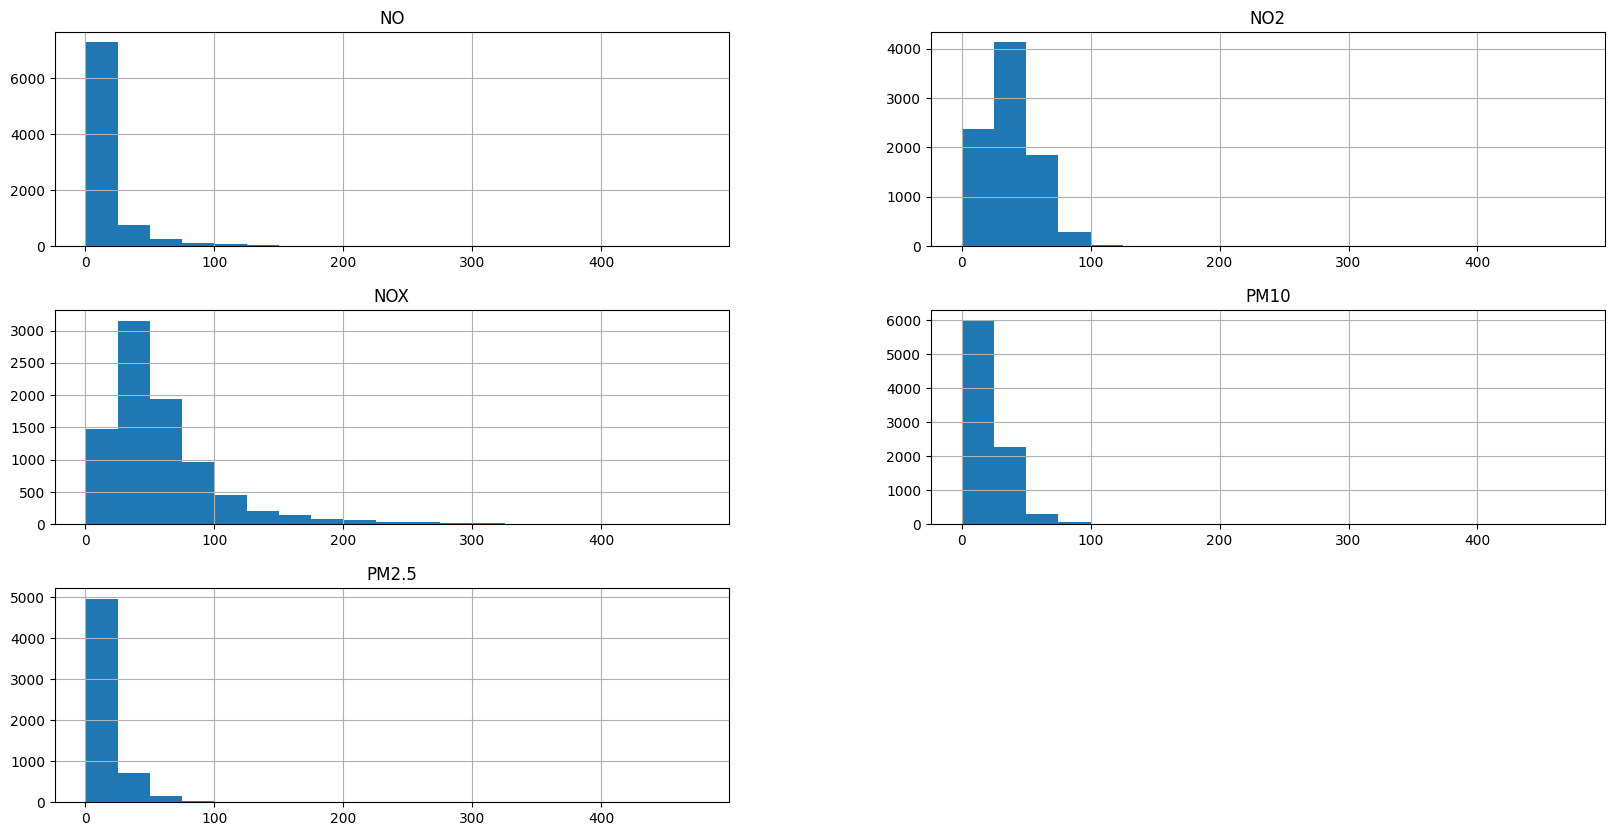

In [17]:
import numpy as np
pvt_df.hist(bins=np.arange(0,500,25), figsize=(20,10))
print('-'*10, 'DESVIACIONES ESTANDAR', '-'*10)
print(pvt_df.std())


* El contaminante con mayor variabilidad (por el histograma y la desviacion estandar) es NOX

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [18]:
# Divde los valores la columna de 'ReadingDataTime' del dataframe 'air_df' en cada espacio y guarda las nuevas columnas e en 'datetime_df'.
# En este caso, la separacion coincide con  la division entre la fecha y hora de la columna
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
# Nombra las columnas del nuevo dataframe 'datetime_df' como 'Date' y 'Time'
datetime_df.columns = ['Date','Time']
# Si esta fuera la ultima linea del bloque de comandos, mostraria el dataframe
datetime_df
# Divde los valores la columna de 'Date' del dataframe 'datetime_df' en cada slash ('/') y guarda las nuevas columnas en 'date_df'.
# En este caso, la separacion coincide con  la division entre dia, mes y año
date_df = datetime_df.Date.str.split('/',expand=True)
# Nombra las columnas del nuevo dataframe 'date_df' como 'Day', 'Month' y 'Year'
date_df.columns = ['Day','Month','Year']
# Si esta fuera la ultima linea del bloque de comandos, mostraria el dataframe
date_df
# Añade el dataframe 'date_df' y la columna 'Time' del dataframe 'datetime_df' al dataframe 'air_df'
# Tambien elimina la columna original de 'ReadingDateTime' y la columna 'Year' del dataframe agregado 'date_df'
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
# Sobreescribe el index del dataframe 'air_df' con las columnas 'Month', 'Day', 'Time' y'Species'
air_df = air_df.set_index(['Month','Day','Time','Species'])
# Muestra el dataframe 'air_df'
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [19]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

* No son iguales las salidas. En la tabla del ejercicio 8, 'Species' era parte del índice; en el ejercicio 9, cada valor de 'Species' es una columna

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

* 'melt()' cambia un dataset ancho a largo, transformando nuestras variables inicialmente mostradas como columnas en filas  y 'pivot()' cambia un dataset largo a ancho, utilizando los valores únicos de una columna ya existente como nuevas columnas.
* 'stack()' convierte las variables representadas como columnas en índices jerarquicos y 'unstack()' convierte índices en columnas jerárquicas
* La similitud entre ambos metodos es que reestructuran el dataset de maneras similares dependiendo de que parametros queramos analizar, ya sea hacerlo más largo o ancho.
* La diferencia se encuentra en como se manejan las columnas y filas e índices. En un stack/unstack las diferentes columnas e indices adquieren orden jerárquico, haciendo más sencilla la operación de hacer análisis utilizando más de dos parámetros.
* La contraparte de 'melt()' sería 'stack()', pues convertir columnas a índices normalmente incrementaría el número de filas, convirtiendolo en un dataset largo.